In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("ks-projects-201801.csv")

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Feature Engineering

In [4]:
for col in df.columns:
    print(col)
    print(df[col].nunique())

ID
378661
name
375764
category
159
main_category
15
currency
14
deadline
3164
goal
8353
launched
378089
pledged
62130
state
6
backers
3963
country
23
usd pledged
95455
usd_pledged_real
106065
usd_goal_real
50339


In [5]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
df["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [7]:
df["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [8]:
del df["ID"]

In [9]:
df["deadline"] = pd.to_datetime(df["deadline"])

In [10]:
df.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched                    object
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [11]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [12]:
df["launched"] = pd.to_datetime(df["launched"])

In [13]:
df["launched"].head()

0   2015-08-11 12:12:28
1   2017-09-02 04:43:57
2   2013-01-12 00:20:50
3   2012-03-17 03:24:11
4   2015-07-04 08:35:03
Name: launched, dtype: datetime64[ns]

In [14]:
df["duration_days"] = df["deadline"] - df["launched"]



In [15]:
df["duration_days"] = df["duration_days"].astype(str).str[:2]



In [16]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration_days
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55


In [17]:
df.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
duration_days               object
dtype: object

In [18]:
df["duration_days"] = pd.to_numeric(df["duration_days"])

In [19]:
df.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
duration_days                int64
dtype: object

In [20]:
df = df.drop(df[df.state == "undefined"].index)

In [21]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
live            2799
suspended       1846
Name: state, dtype: int64

In [22]:
df = df.drop(df[(df.state == "live") | (df.state == "suspended")].index)

In [23]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
Name: state, dtype: int64

In [24]:
df["state"] = np.where(df["state"] == "canceled", "failed", df["state"])

In [25]:
df.state.value_counts()

failed        236498
successful    133956
Name: state, dtype: int64

In [26]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration_days
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,59
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,44
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,29
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,failed,14,US,1283.00,1283.00,19500.00,55
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,34
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,19
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,44
8,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,failed,58,US,8233.00,8233.00,125000.00,34
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,failed,43,US,6240.57,6240.57,65000.00,29


In [27]:
del df["category"]
del df["currency"]

df["main_category"].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [28]:
df["month_launched"] = df["launched"].dt.month

In [29]:
df.head()

,name,main_category,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration_days,month_launched
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58,8
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59,9
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29,3
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00,55,7


In [30]:
df["month_launched"] = np.where(df["month_launched"] == 1, "January", 
                                (np.where(df["month_launched"] == 2, "February", 
                                          (np.where(df["month_launched"] == 3, "March", 
                                                   (np.where(df["month_launched"] == 4, "April",
                                                            (np.where(df["month_launched"] == 5, "May",
                                                                     (np.where(df["month_launched"] == 6, "June",
                                                                              (np.where(df["month_launched"] == 7, "July",
                                                                                       (np.where(df["month_launched"] == 8, "August",
                                                                                                (np.where(df["month_launched"] == 9, "September",
                                                                                                         (np.where(df["month_launched"] == 10, "October",
                                                                                                                  (np.where(df["month_launched"] == 11, "November",
                                                                                                                           (np.where(df["month_launched"] == 12, "December", "Undefined")))))))))))))))))))))))

In [31]:
df.head(10)

,name,main_category,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration_days,month_launched
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,58,August
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,59,September
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,44,January
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,29,March
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,failed,14,US,1283.00,1283.00,19500.00,55,July
5,Monarch Espresso Bar,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,34,February
6,Support Solar Roasted Coffee & Green Energy! ...,Food,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,19,December
7,Chaser Strips. Our Strips make Shots their B*tch!,Food,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,44,February
8,SPIN - Premium Retractable In-Ear Headphones w...,Design,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,failed,58,US,8233.00,8233.00,125000.00,34,April
9,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,failed,43,US,6240.57,6240.57,65000.00,29,July


In [32]:
df["country"].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

In [33]:
df.dtypes

name                        object
main_category               object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
duration_days                int64
month_launched              object
dtype: object

In [34]:
df = pd.concat([df, pd.get_dummies(df[["main_category", "country", "month_launched"]])], axis=1)



In [35]:
df.shape

(370454, 64)

In [36]:
df["successful"] = np.where(df["state"] == "successful", 1, 0)

In [37]:
del df["state"]

In [38]:
df.head()

,name,main_category,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,...,month_launched_February,month_launched_January,month_launched_July,month_launched_June,month_launched_March,month_launched_May,month_launched_November,month_launched_October,month_launched_September,successful
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,GB,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,US,100.0,2421.0,...,0,0,0,0,0,0,0,0,1,0
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,US,220.0,220.0,...,0,1,0,0,0,0,0,0,0,0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,US,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,US,1283.0,1283.0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
del df["month_launched"]
del df["name"]
del df["main_category"]
del df["country"]
del df["deadline"]
del df["launched"]


In [40]:
df.isna().sum()

goal                            0
pledged                         0
backers                         0
usd pledged                   232
usd_pledged_real                0
usd_goal_real                   0
duration_days                   0
main_category_Art               0
main_category_Comics            0
main_category_Crafts            0
main_category_Dance             0
main_category_Design            0
main_category_Fashion           0
main_category_Film & Video      0
main_category_Food              0
main_category_Games             0
main_category_Journalism        0
main_category_Music             0
main_category_Photography       0
main_category_Publishing        0
main_category_Technology        0
main_category_Theater           0
country_AT                      0
country_AU                      0
country_BE                      0
country_CA                      0
country_CH                      0
country_DE                      0
country_DK                      0
country_ES    

In [41]:
df = df.dropna()

In [42]:
#now that a few different features have been engineered (e.g., duration, launch month), setting up a training and test set

offset = int(df.shape[0] / 2)
df_train = df.iloc[:offset]
df_test = df.iloc[offset:]

x_train, y_train = df_train.loc[:, ~df_train.columns.isin(["successful"])], df_train["successful"]
x_test, y_test = df_test.loc[:, ~df_test.columns.isin(["successful"])], df_test["successful"]

## Trying out several possible models to find the most accurate one

In [43]:
#Naive Bayes

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
model = bnb.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
print("Percent accuracy for Naive Bayes on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Naive Bayes on training set:  0.6005801924250855


In [44]:
y_pred_test = model.predict(x_test)
print("Percent accuracy for Naive Bayes on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])


Percent accuracy for Naive Bayes on test set:  0.5992296513983502


In [45]:
#KNN Regression
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=30, weights="distance")
neighbors.fit(x_train, y_train)
y_pred_train = neighbors.predict(x_train)
print("Percent accuracy for KNN on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for KNN on training set:  0.9999945978358931


In [46]:
y_pred_test = neighbors.predict(x_test)
print("Percent accuracy for KNN on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for KNN on test set:  0.9959267682633663


In [ ]:
#lasso regression
from sklearn.linear_model import LogisticRegression

#checking for the most accurate lambda to use
lambdas = [.02, .05, .10, .15, .25, .35, .5, .55, .65, .75, .95, 1, 1.1]


for lam in lambdas:
    lass = LogisticRegression(C=1/lam, fit_intercept=False, penalty="l1")
    lass.fit(x_train, y_train)
    print(lam, lass.score(x_train, y_train))


In [48]:
#lasso regression
from sklearn.linear_model import LogisticRegression

lass = LogisticRegression(fit_intercept=False, penalty="l1")
lass.fit(x_train, y_train)
y_pred_train = lass.predict(x_train)

print("Percent accuracy for Lasso Regression on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Lasso Regression on training set:  0.7454176142962871


In [49]:
y_pred_test = lass.predict(x_test)
print("Percent accuracy for Lasso Regression on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for Lasso Regression on test set:  0.7472435457644332


In [51]:
y_train_tree = np.where(df_train["successful"] == 1, "successful", "failed")
y_test_tree = np.where(df_test["successful"] == 1, "successful", "failed")


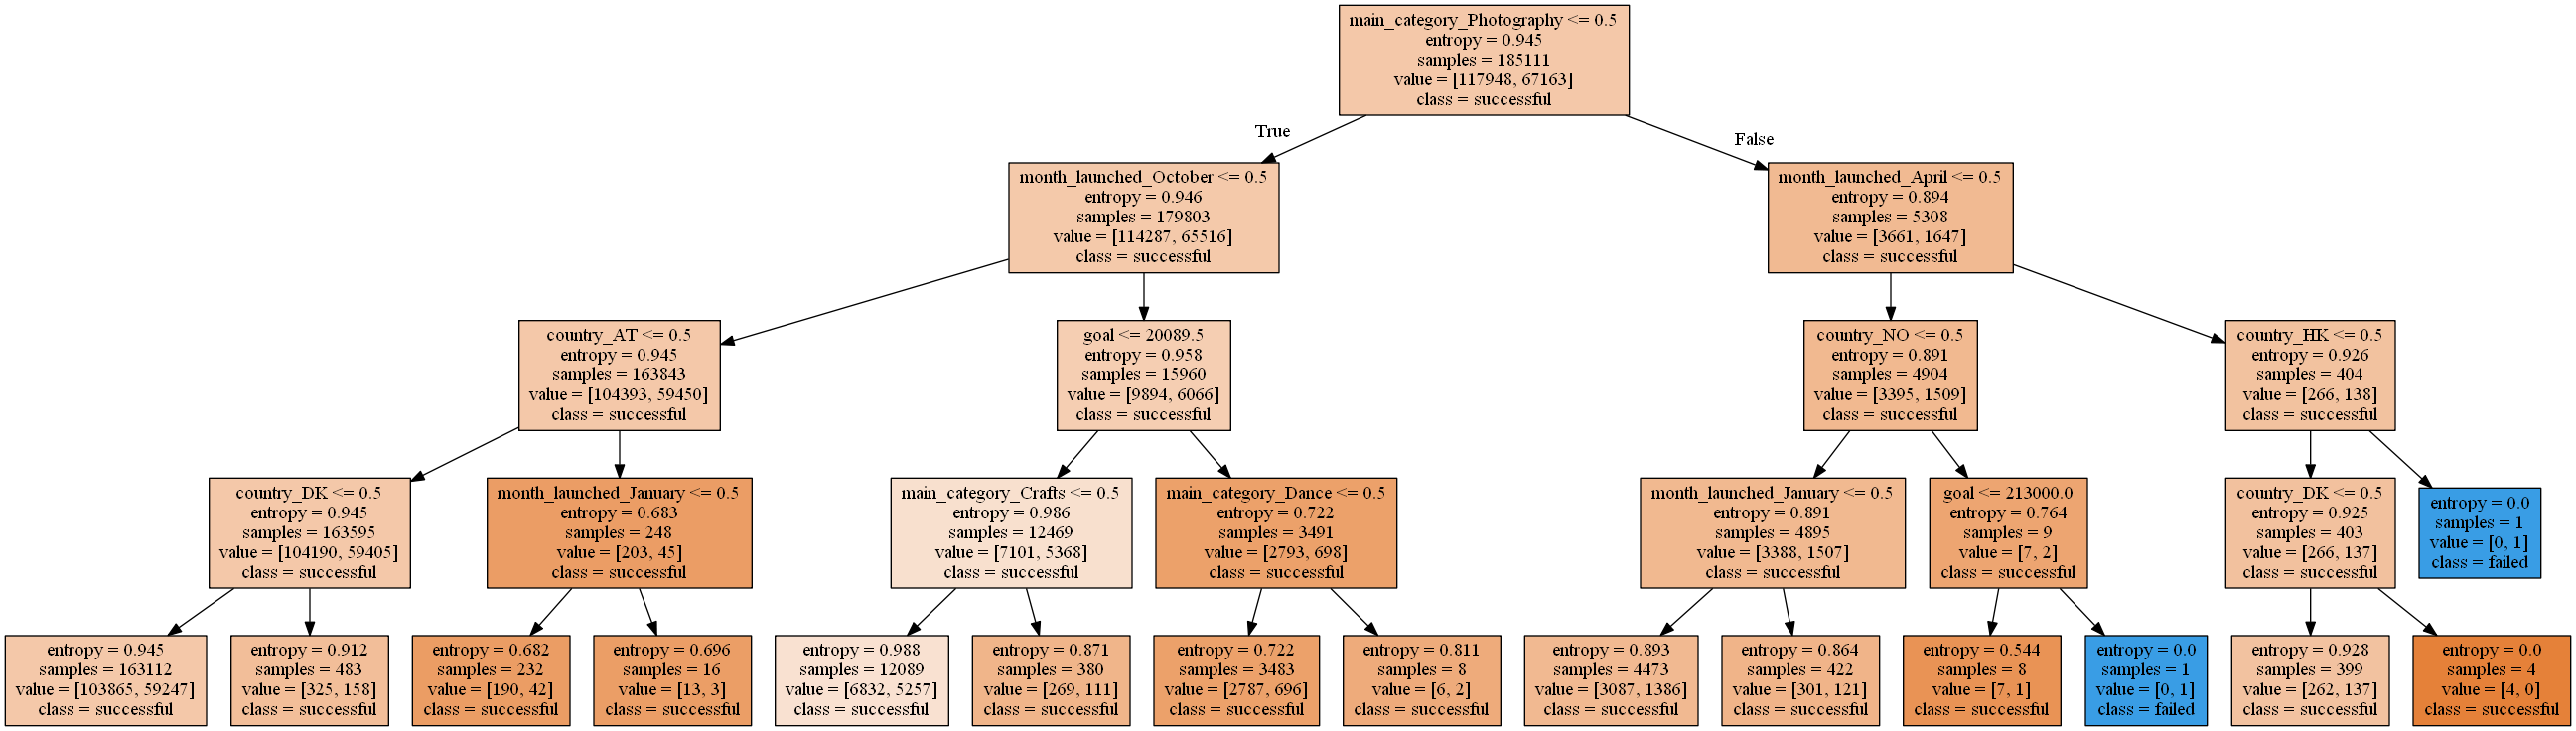

In [52]:
#Decision Tree

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import tree
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)
model = decision_tree.fit(x_train, y_train_tree)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=x_train.columns,
    class_names=["successful", "failed"],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [53]:
y_pred_train = model.predict(x_train)
print("Percent accuracy for Decision Tree on training set: ", (y_pred_train == y_train_tree).sum() / df_train.shape[0])

Percent accuracy for Decision Tree on training set:  0.6371852564137194


In [54]:
y_pred_test = model.predict(x_test)
print("Percent accuracy for Decision Tree on test set: ", (y_pred_test == y_test_tree).sum() / df_test.shape[0])

Percent accuracy for Decision Tree on test set:  0.6397350778721956


In [55]:
# Random Forest
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()

rfc.fit(x_train, y_train)
y_pred_train = rfc.predict(x_train)
print("Percent accuracy for Random Forest on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

Percent accuracy for Random Forest on training set:  0.9997839134357224


In [56]:
y_pred_test = rfc.predict(x_test)
print("Percent accuracy for Random Forest on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])

Percent accuracy for Random Forest on test set:  0.9951002371550043


In [ ]:
#SVC

from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
print("Percent accuracy for SVM on training set: ", (y_pred_train == y_train).sum() / df_train.shape[0])

In [ ]:
y_pred_test = svm.predict(x_test)
print("Percent accuracy for SVM on test set: ", (y_pred_test == y_test).sum() / df_test.shape[0])